# Emotion classification based on the speech data
## importing all the necessary libraries 

In [399]:
import IPython.display as ipd
import pandas as pd
import numpy as np
import librosa
import librosa.display
import os
import seaborn as sns
import matplotlib.pyplot as plt

## Loading the data 

In [400]:
import os

def emotion_finder(file_name):
    emotion = {
        "01": "neutral",
        "02": "calm",
        "03": "happy",
        "04": "sad",
        "05": "angry",
        "06": "fearful",
        "07": "disgust",
        "08": "surprised"
    }
    index = file_name.split("-")[2]
    return emotion.get(index, "unknown")


### The above funtion gives the emotion based on the number in the file_name
### as follows 
         01 : neutral
         02 : calm
         03 : happy
         04 : sad
         05 : angry
         06 : fearful
         07 : disgust
         08 : surprised


In [401]:
emotions_list = []
actor_names = []
file_names = []

# Two main folders
folders = [
    "Audio_Song_Actors_01-24",
    "Audio_Speech_Actors_01-24"
]


In [402]:
# Go through each top-level folder
for pre in folders:
    for actor_name in os.listdir(pre):
        actor_path = os.path.join(pre, actor_name)
        if not os.path.isdir(actor_path):
            continue  # Skip files
        actor_names.append(actor_name)
        for filename in os.listdir(actor_path):
            if filename.endswith(".wav"):
                full_path = os.path.join(actor_path, filename)
                file_names.append(full_path)
                emotion = emotion_finder(filename)
                emotions_list.append(emotion)
emotion_list

['neutral', 'calm', 'happy', 'sad', 'angry', 'fearful', 'disgust', 'surprised']

## Perfoming EDA

### Checking wheather the dataset is balanced or Not

Number of files: 2452
Number of emotions: 2452
emotion
happy        376
calm         376
fearful      376
angry        376
sad          376
disgust      192
surprised    192
neutral      188
Name: count, dtype: int64
Audio_Song_Actors_01-24/Actor_16/03-02-03-02-02-02-16.wav


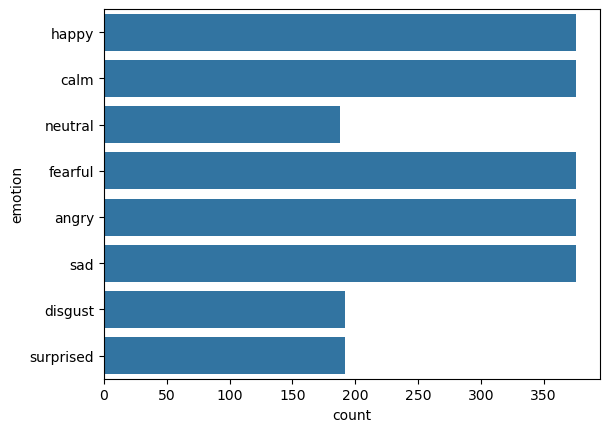

In [403]:

print("Number of files:", len(file_names))
print("Number of emotions:", len(emotions_list))
df = pd.DataFrame()
df["file_name"] = file_names
df["emotion"] = emotions_list
print(df["emotion"].value_counts())
sns.countplot(df["emotion"])
print(df["file_name"][0])


### In the above bar graph we can observe that emotions are not in same size so, for balancing the dataset I over samples the minority emotions.

In [404]:
def plot_waveform_and_spectrogram(data, sr, emotion):
    plt.figure(figsize=(10, 3))
    
    # Waveform
    plt.subplot(1, 2, 1)
    librosa.display.waveshow(data, sr=sr)
    plt.title(f"Waveform - {emotion}", fontsize=12)
    
    # Spectrogram
    plt.subplot(1, 2, 2)
    x = librosa.stft(data)
    xdb = librosa.amplitude_to_db(abs(x))
    librosa.display.specshow(xdb, sr=sr, x_axis='time', y_axis='hz')
    plt.colorbar(format='%+2.0f dB')
    plt.title(f"Spectrogram - {emotion}", fontsize=12)
    
    plt.tight_layout()
    plt.show()

In [407]:
df = pd.DataFrame({"file_path": file_names, "emotion": emotions_list})
max_count = df['emotion'].value_counts().max()
balanced_df = pd.concat([
    resample(df[df.emotion == e], replace=True, n_samples=max_count, random_state=42)
    for e in df['emotion'].unique()]).sample(frac=1, random_state=42)
real_df = df
#Here i am saving the real dataset for duration
df = balanced_df
balanced_df["emotion"].value_counts()


emotion
calm         376
disgust      376
neutral      376
surprised    376
happy        376
sad          376
angry        376
fearful      376
Name: count, dtype: int64

### Now we can observe that all the emotions are in same size

### Defing a function that shows the waveplot and the spectrogram
### Now we are finding the all the waveplot and spectrogram for each of the emotions 

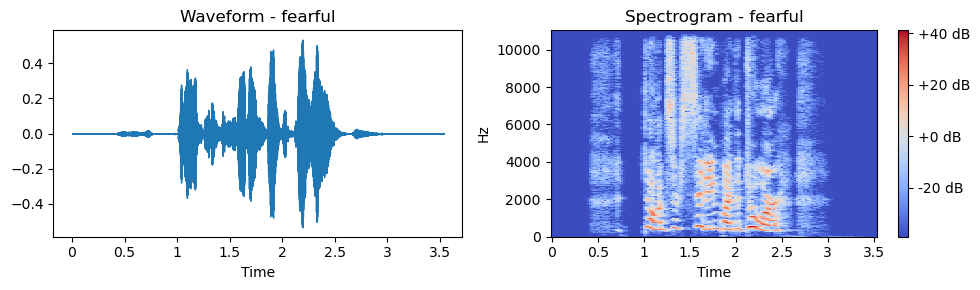

In [367]:
emotion = 'fearful'
filtered_df = df[df['emotion']==emotion]
path = filtered_df['file_path'].values[0]
data, sampling_rate = librosa.load(path)
plot_waveform_and_spectrogram(data, sampling_rate, emotion)
Audio(path)


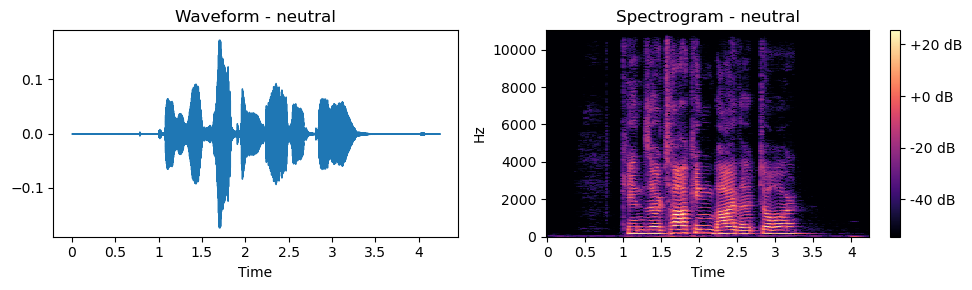

In [368]:
emotion = 'neutral'
filtered_df = df[df['emotion']==emotion]
path = filtered_df['file_path'].values[0]
data, sampling_rate = librosa.load(path)
plot_waveform_and_spectrogram(data, sampling_rate, emotion)
Audio(path)

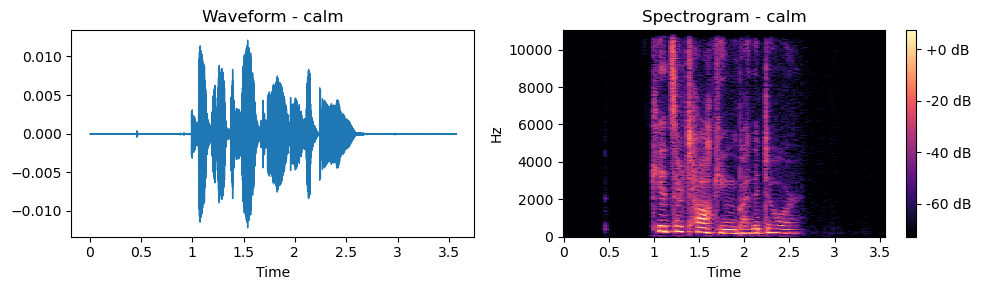

In [369]:
emotion = 'calm'
filtered_df = df[df['emotion']==emotion]
path = filtered_df['file_path'].values[0]
data, sampling_rate = librosa.load(path)
plot_waveform_and_spectrogram(data, sampling_rate, emotion)
Audio(path)

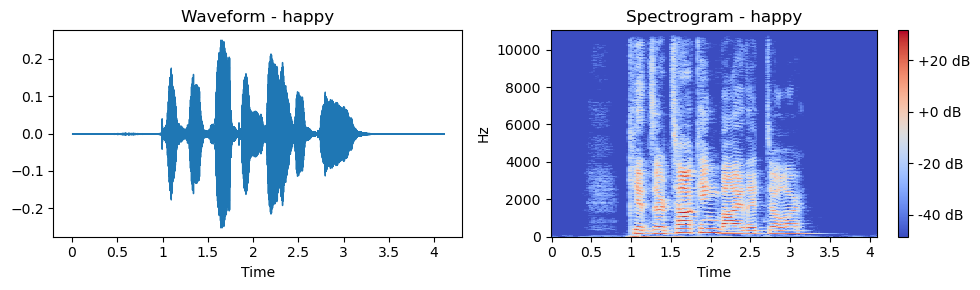

In [370]:
emotion = 'happy'
filtered_df = df[df['emotion']==emotion]
path = filtered_df['file_path'].values[0]
data, sampling_rate = librosa.load(path)
plot_waveform_and_spectrogram(data, sampling_rate, emotion)
Audio(path)

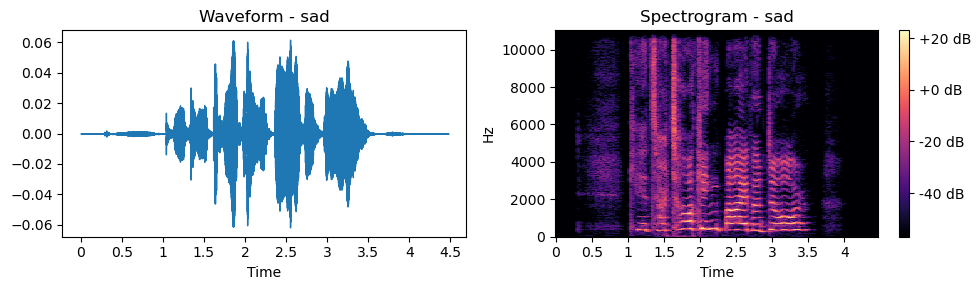

In [371]:
emotion = 'sad'
filtered_df = df[df['emotion']==emotion]
path = filtered_df['file_path'].values[0]
data, sampling_rate = librosa.load(path)
plot_waveform_and_spectrogram(data, sampling_rate, emotion)
Audio(path)

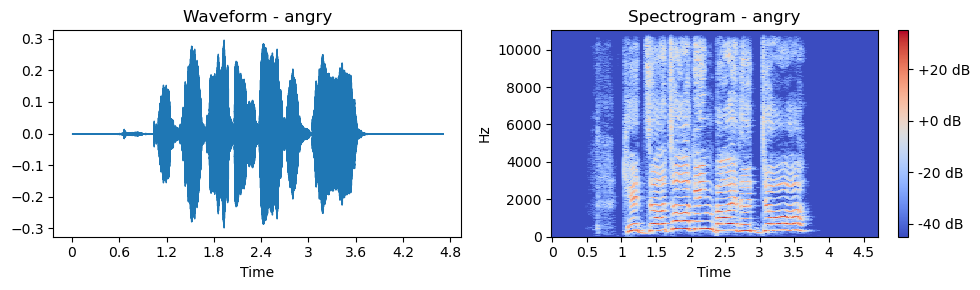

In [372]:
emotion = 'angry'
filtered_df = df[df['emotion']==emotion]
path = filtered_df['file_path'].values[0]
data, sampling_rate = librosa.load(path)
plot_waveform_and_spectrogram(data, sampling_rate, emotion)
Audio(path)

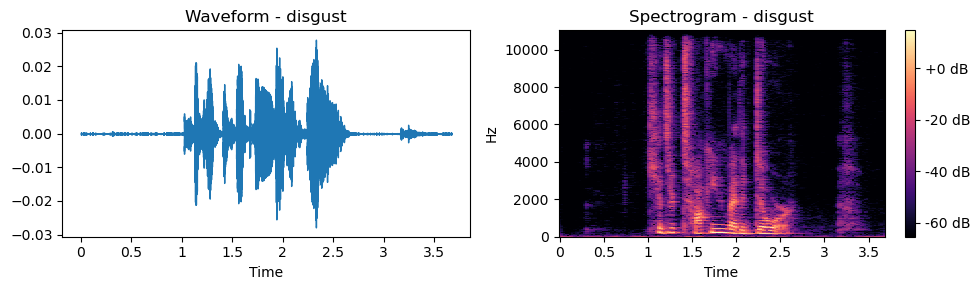

In [373]:
emotion = 'disgust'
filtered_df = df[df['emotion']==emotion]
path = filtered_df['file_path'].values[0]
data, sampling_rate = librosa.load(path)
plot_waveform_and_spectrogram(data, sampling_rate, emotion)
Audio(path)

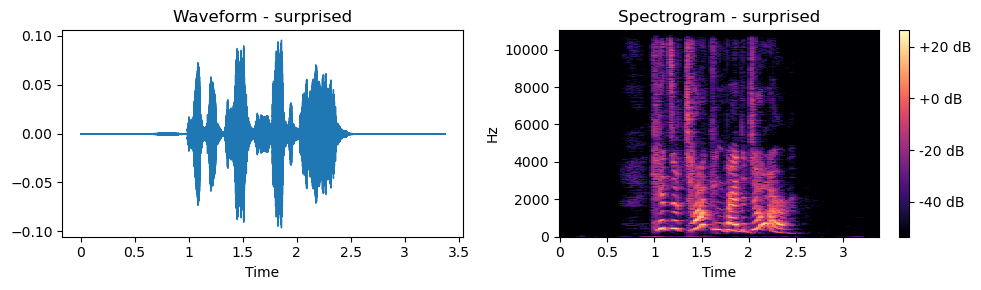

In [374]:
emotion = 'surprised'
filtered_df = df[df['emotion']==emotion]
path = filtered_df['file_path'].values[0]
data, sampling_rate = librosa.load(path)
plot_waveform_and_spectrogram(data, sampling_rate, emotion)
Audio(path)


### Finding the duration of the dataset

In [375]:
def dur_time(file_name):
    sig,sr = librosa.load(file_name)
    duration = librosa.get_duration(y = sig,sr = sr)
    return duration

In [379]:
duration_values = []
for i in real_df["file_path"]:
    duration_values.append(dur_time(i))
df_durations = pd.DataFrame(columns=["emotion", "Duration"])
df_durations["emotion"] = emotions_list
df_durations["Duration"] = duration_values

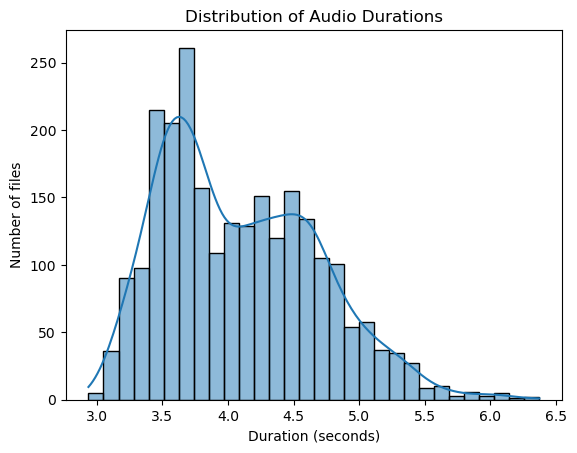

In [381]:
sns.histplot(df_durations["Duration"], bins=30, kde=True)
plt.title("Distribution of Audio Durations")
plt.xlabel("Duration (seconds)")
plt.ylabel("Number of files")
plt.show()


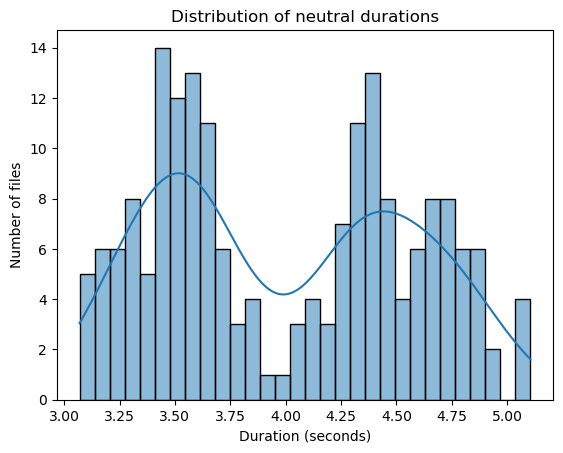

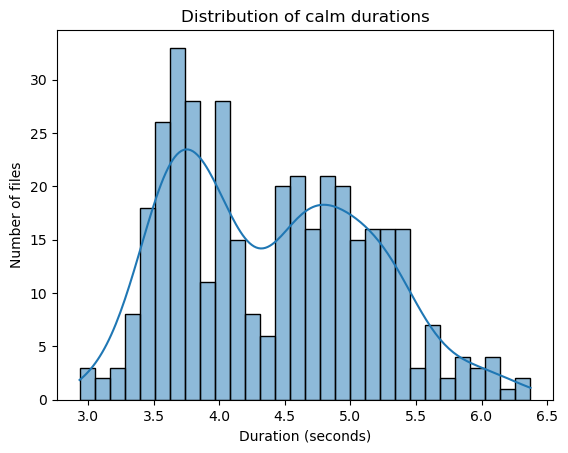

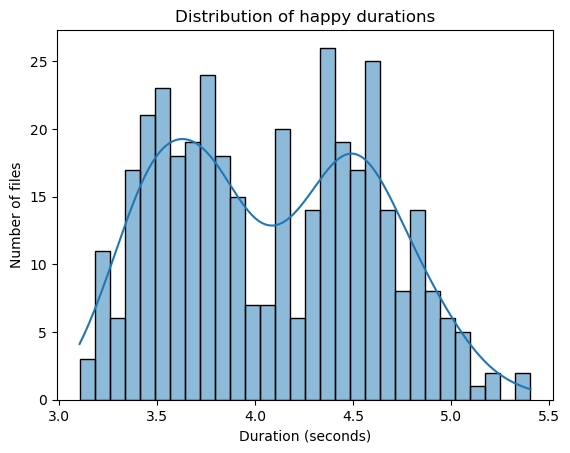

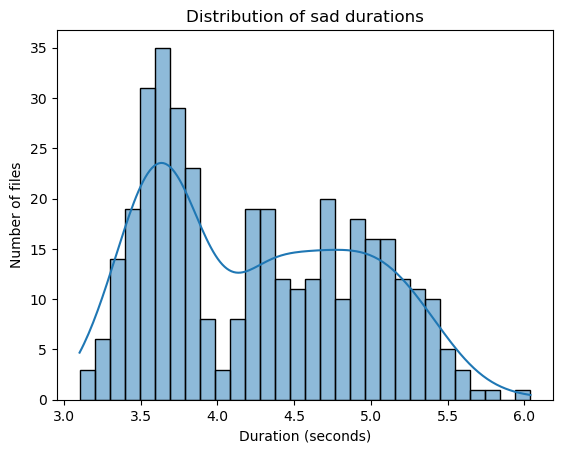

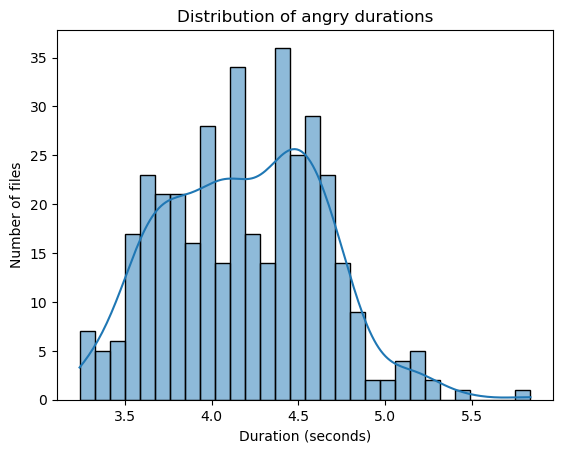

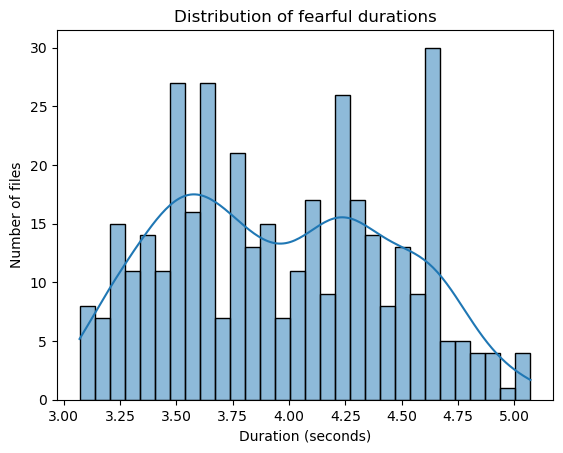

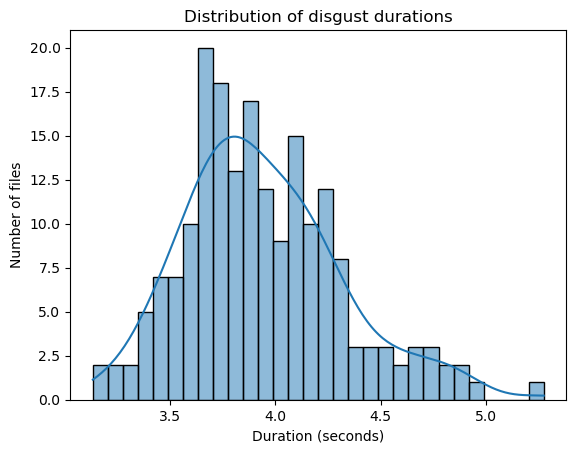

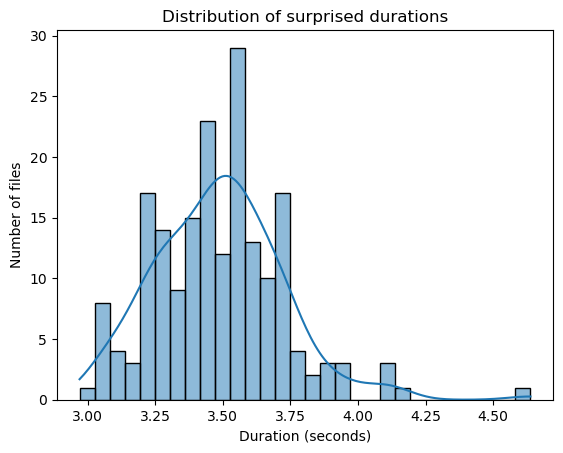

In [386]:
emotion_list = [ "neutral","calm","happy","sad","angry","fearful","disgust","surprised"]
for emo in emotion_list:
    sns.histplot(df_durations["Duration"][df_durations["emotion"] == emo], bins=30, kde=True)
    plt.title(f"Distribution of {emo} durations")
    plt.xlabel("Duration (seconds)")
    plt.ylabel("Number of files")
    plt.show()


## Extracting all the features 

### Extracting mfcc

In [309]:
def mfcc_values(filename):
    y, sr = librosa.load(filename, duration=3, offset=0.5)
    mfcc = np.mean(librosa.feature.mfcc(y=y, sr=sr, n_mfcc=40).T, axis=0)
    return mfcc
mfcc_values(df["file_path"][4])


array([-5.37985291e+02,  4.48523369e+01, -9.04678726e+00,  8.11759853e+00,
       -1.06328478e+01, -2.11637573e+01, -1.88366203e+01, -1.48001585e+01,
       -1.25224361e+01, -2.91228724e+00, -2.15363693e+01, -2.90138102e+00,
       -3.18647647e+00, -1.52535458e+01, -6.54296684e+00, -6.70718908e+00,
       -2.74479699e+00,  9.59756756e+00,  1.65635777e+01,  2.59536705e+01,
        2.00058403e+01,  1.22111683e+01,  3.58160067e+00, -1.10241308e+01,
       -6.38207865e+00,  1.10321057e+00, -2.00678277e+00, -1.85402185e-01,
       -1.14430408e+01, -1.05791759e+01, -3.98148155e+00,  1.43768549e+00,
       -6.21638203e+00, -4.52301455e+00, -7.86416006e+00,  2.63380218e+00,
       -5.82667410e-01,  1.92557180e+00,  1.05485439e+00,  1.33748617e+01],
      dtype=float32)

### Extracting delta mfcc values

In [310]:
def delta_values(file_name):
    mfcc = mfcc_values(file_name)
    delta_mfcc =  librosa.feature.delta(mfcc)
    return delta_mfcc
delta_values(df["file_path"][4])

array([31.233881  , 31.233881  , 31.233881  , 31.233881  , 31.233881  ,
       -4.2587457 , -1.3410594 , -0.56615597,  1.5176831 ,  1.422915  ,
        1.1082879 ,  0.732961  ,  0.7560082 ,  1.5907671 ,  3.322106  ,
        3.8028462 ,  4.6484795 ,  4.568923  ,  2.6518452 ,  0.17301483,
       -1.9353446 , -3.219904  , -3.7473993 , -3.3795626 , -2.7005777 ,
       -1.8363758 , -0.6721334 ,  0.40413377, -0.21128267, -0.4070994 ,
       -0.23286945,  0.5315147 ,  1.1559062 ,  1.0159981 ,  0.66722083,
        1.4956846 ,  1.4956846 ,  1.4956846 ,  1.4956846 ,  1.4956846 ],
      dtype=float32)

### Extracting mel log spectogram

In [311]:
def log_mel_values(file_path, duration=3, offset=0.5, n_mels=128):
    y, sr = librosa.load(file_path, duration=duration, offset=offset)
    mel_spec = librosa.feature.melspectrogram(y=y, sr=sr, n_mels=n_mels)
    log_mel_spec = librosa.power_to_db(mel_spec)
    log_mel_mean = np.mean(log_mel_spec.T, axis=0)
    
    return log_mel_mean
log_mel_values(df["file_path"][4])


array([-54.55206 , -53.31526 , -52.069855, -51.543404, -51.98313 ,
       -52.88117 , -52.4313  , -52.531895, -49.959427, -45.903072,
       -41.808414, -29.432001, -18.930237, -17.43888 , -24.527937,
       -34.08741 , -40.80093 , -44.770107, -44.946198, -44.182446,
       -46.107437, -46.30268 , -44.37879 , -42.874317, -37.897297,
       -29.499254, -26.344736, -30.279459, -38.98919 , -40.50541 ,
       -42.520485, -46.649414, -48.124397, -49.344154, -50.61566 ,
       -52.39684 , -52.041866, -47.160652, -39.825344, -34.894386,
       -38.53378 , -45.85931 , -50.388626, -48.732086, -48.65652 ,
       -49.999607, -51.61639 , -52.742863, -50.777485, -43.67606 ,
       -41.400406, -44.134712, -50.99638 , -53.263054, -50.86732 ,
       -50.608807, -49.352165, -46.773766, -41.985428, -41.76949 ,
       -46.139774, -49.05568 , -48.825623, -46.119915, -43.599934,
       -41.102917, -41.77249 , -45.74372 , -48.195187, -47.168976,
       -43.157887, -41.910206, -45.2689  , -50.772358, -51.649

### Extracting ZCR

In [312]:
def zcr_values(file_name):
    sig ,sr = librosa.load(file_name,duration=3, offset = 0.5)
    zcr = np.mean(librosa.feature.zero_crossing_rate(sig).T, axis=0)
    return zcr
zcr_values(df["file_path"][4])

array([0.2345628])

### Extracting Spectral_features

In [313]:
def spectral_features(file_path, duration=3, offset=0.5):
    y, sr = librosa.load(file_path, duration=duration, offset=offset)
    centroid = np.mean(librosa.feature.spectral_centroid(y=y, sr=sr))
    bandwidth = np.mean(librosa.feature.spectral_bandwidth(y=y, sr=sr))
    contrast = np.mean(librosa.feature.spectral_contrast(y=y, sr=sr), axis=1)
    rolloff = np.mean(librosa.feature.spectral_rolloff(y=y, sr=sr))
    flatness = np.mean(librosa.feature.spectral_flatness(y=y))
    spectral_features = np.hstack([centroid, bandwidth, rolloff, flatness, contrast])

    return spectral_features
spectral_features(df["file_path"][4])

array([2.88523434e+03, 2.19333153e+03, 4.90153677e+03, 6.55524656e-02,
       1.27833948e+01, 2.54198791e+01, 2.43953345e+01, 2.22604847e+01,
       2.20784439e+01, 2.07776762e+01, 4.59853808e+01])

### After defing all the features now I am making all the features in one function

In [314]:
def extract_features(file_name):
    mfcc = mfcc_values(file_name)
    delta = delta_values(file_name)
    log_mel = log_mel_values(file_name)
    zcr = zcr_values(file_name)
    spectral = spectral_features(file_name)
    all_features = np.hstack([mfcc,delta,log_mel,zcr,spectral])
    return all_features

In [333]:
features = []
labels = []

for i, row in df.iterrows():
    f = extract_features(row['file_path'])
    features.append(f)
    labels.append(row['emotion'])

X = np.array(features)
y = np.array(labels)
X

array([[-749.82434082,   45.34711075,    5.39791918, ...,   15.30216391,
          14.67320397,   44.13513425],
       [-676.39764404,   51.6876564 ,    3.50471067, ...,   16.32609831,
          16.23923566,   44.32139485],
       [-650.76330566,   83.41545868,    5.38883924, ...,   17.13861402,
          16.90015193,   45.08293234],
       ...,
       [-454.52999878,   23.91750526,  -30.11061859, ...,   19.76324564,
          19.37341693,   45.94511165],
       [-493.13421631,   57.25174332,   -9.48130512, ...,   17.33126489,
          17.48336111,   45.13310366],
       [-530.93945312,   89.84202576,   -6.50292015, ...,   19.70971068,
          21.01635801,   48.02231399]])

In [316]:
X.shape


(3008, 220)

### Storing the feature values in the csv file 

In [340]:
X_df = pd.DataFrame(X)  
X_df["emotion"] = y     
X_df.to_csv("features_dataset.csv", index=False)
X_df.head()

0          1          2          3          4          5  \
0 -749.824341  45.347111   5.397919  12.503951  -5.115011  -3.959500   
1 -676.397644  51.687656   3.504711  12.461249  -0.583479  -6.330075   
2 -650.763306  83.415459   5.388839  14.432660   0.681126   0.573501   
3 -478.968567  35.312210 -13.229901  -8.166579 -13.992219 -11.982151   
4 -478.903656  87.044739 -23.237679  16.559616   2.273984 -11.735126   

           6          7          8         9  ...          211       212  \
0  -6.275662  -7.190837  -5.774430 -6.900237  ...  6531.848708  0.243149   
1   0.849189 -16.102125  -7.669559 -5.315458  ...  5884.775954  0.194785   
2  -2.958936 -10.139343  -5.821090  0.346428  ...  4856.317045  0.030680   
3 -14.251314 -20.607779 -16.810604 -5.394718  ...  5355.970177  0.132804   
4  -0.923207  -4.963805 -15.810334 -1.255884  ...  3785.868389  0.037286   

         213        214        215        216        217        218  \
0  16.967018  15.424356  15.940212  14.794734  15.302164  14.673204   
1  19.371361  16.240585  17.956810  14.654750  16.326098  16.239236   
2  20.617958  14.551764  16.337308  15.769381  17.138614  16.900152   
3  16.251345  19.005629  18.787033  16.956467  17.894460  18.349314   
4  26.476757  20.528570  22.705827  20.552947  19.745503  20.832447   

         219  emotion  
0  44.135134     calm  
1  44.321395     calm  
2  45.082932  disgust  
3  43.292865  disgust  
4  48.282249  neutral  

[5 rows x 221 columns]

In [317]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, stratify=y, random_state=42)


### RandomForestClassifier -- model

In [341]:
import joblib

from sklearn.ensemble import RandomForestClassifier
clf = RandomForestClassifier()
clf.fit(X_train, y_train)
joblib.dump(clf, 'RandomForest_emotion_model.pkl')

['RandomForest_emotion_model.pkl']

### Now the model is saved into "emotion_model.pkl" so now we load it

In [343]:
clf = joblib.load("emotion_model.pkl")

from sklearn.metrics import classification_report, confusion_matrix
y_pred = clf.predict(X_test)
print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))


[[62  0  5  2  0  0  1  5]
 [ 0 73  0  0  1  1  0  0]
 [ 0  0 73  0  0  0  0  2]
 [ 5  0  4 61  2  1  2  1]
 [ 2  1  1  0 64  0  1  6]
 [ 0  3  0  0  0 72  0  0]
 [ 0  2  3  4  0  1 66  0]
 [ 0  0  1  0  0  1  0 73]]
              precision    recall  f1-score   support

       angry       0.90      0.83      0.86        75
        calm       0.92      0.97      0.95        75
     disgust       0.84      0.97      0.90        75
     fearful       0.91      0.80      0.85        76
       happy       0.96      0.85      0.90        75
     neutral       0.95      0.96      0.95        75
         sad       0.94      0.87      0.90        76
   surprised       0.84      0.97      0.90        75

    accuracy                           0.90       602
   macro avg       0.91      0.90      0.90       602
weighted avg       0.91      0.90      0.90       602



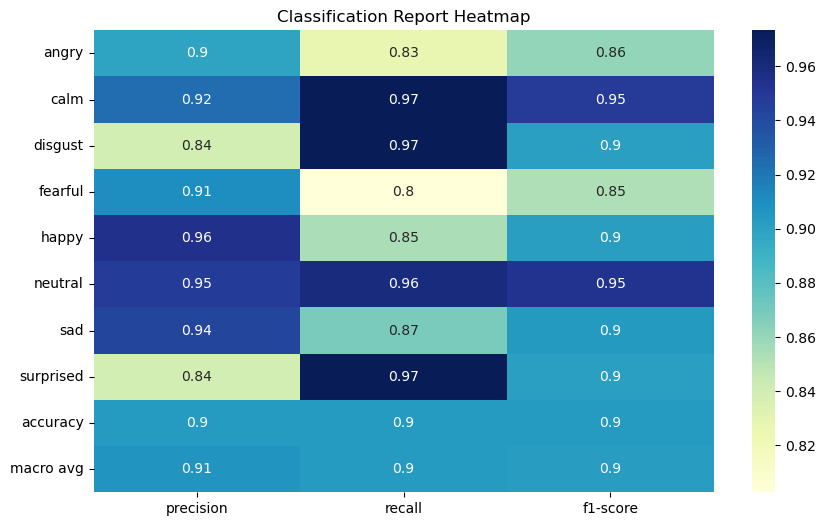

In [344]:
from sklearn.metrics import classification_report
import pandas as pd

# Generate classification report dictionary
report_dict = classification_report(y_test, y_pred, output_dict=True)
report_df = pd.DataFrame(report_dict).transpose()

# Drop support if you don’t want it
plt.figure(figsize=(10, 6))
sns.heatmap(report_df.iloc[:-1, :-1], annot=True, cmap='YlGnBu')
plt.title("Classification Report Heatmap")
plt.show()
